In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib

In [16]:
import tensorflow
from keras.models import Sequential
from keras.layers import InputLayer,Dense,Flatten
import keras.optimizers
from imblearn.over_sampling import SMOTE

In [17]:
data=pd.read_csv("Data_set.csv")
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.412998,0.155442,1491.688354,2075.824182,3184.355745,0.045976,-218.810582,122.234486,27.920799,23.722941,...,6.255844,-2.542397,-0.917639,-4.774317,1.211038,-0.386343,1.133951,-1.452190,1.454535,happy
1,0.245947,0.054352,1355.436173,1593.794832,2316.702658,0.079156,-303.857916,135.956505,1.837915,-4.874345,...,0.263212,-5.682631,-5.087810,-4.466399,1.721484,-3.062391,1.726126,-1.344901,1.373775,happy
2,0.288459,0.104142,2780.992818,2734.300963,5996.347074,0.126230,-161.873294,68.848801,5.828112,11.746237,...,-4.743239,-10.335518,-4.159141,-13.455315,-3.056518,-1.854449,5.620204,5.784562,6.859507,happy
3,0.416686,0.104299,1956.403155,2367.232773,4151.241565,0.082464,-232.575934,97.964434,50.036333,18.321141,...,3.257361,-3.996707,-0.013201,-4.564516,-0.299851,-4.393319,0.554737,-0.721076,2.880039,happy
4,0.306054,0.025305,899.636430,1409.779893,1665.939926,0.048648,-422.361991,166.701699,14.188575,34.022760,...,4.226305,-3.073821,-0.164215,-3.138441,-0.325738,-6.829200,-2.746969,-4.609186,3.289205,happy


In [18]:
data.shape

(600, 27)

In [19]:
data.drop_duplicates(inplace=True)

## Splitting data into traning & testing

In [20]:
x=data.iloc[:,:26]
label=data.iloc[:,26]

In [21]:
smt=SMOTE()
xb,yb=smt.fit_resample(x,label)

In [22]:
le=LabelEncoder()
scaler=StandardScaler()

y=le.fit_transform(yb)
X=scaler.fit_transform(xb)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Defining the architecture of the model

In [24]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6912      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 48,259
Trainable params: 48,259
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=128)

Epoch 1/100
4/4 [==============================] - 1s 63ms/step - loss: 1.0923 - accuracy: 0.4046 - val_loss: 0.9832 - val_accuracy: 0.5333
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9579 - accuracy: 0.5514 - val_loss: 0.9320 - val_accuracy: 0.5583
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.8945 - accuracy: 0.5618 - val_loss: 0.9027 - val_accuracy: 0.5667
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.8653 - accuracy: 0.5891 - val_loss: 0.8896 - val_accuracy: 0.5583
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.8360 - accuracy: 0.6017 - val_loss: 0.8867 - val_accuracy: 0.5583
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.8058 - accuracy: 0.6226 - val_loss: 0.8832 - val_accuracy: 0.5583
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7766 - accuracy: 0.6562 - val_loss: 0.8817 - val_accuracy: 0.5583
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 10ms/step - loss: 0.0879 - accuracy: 0.9518 - val_loss: 2.0389 - val_accuracy: 0.5167
Epoch 60/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0801 - accuracy: 0.9665 - val_loss: 2.1835 - val_accuracy: 0.5083
Epoch 61/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0810 - accuracy: 0.9581 - val_loss: 2.1084 - val_accuracy: 0.4917
Epoch 62/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0830 - accuracy: 0.9560 - val_loss: 2.0682 - val_accuracy: 0.5083
Epoch 63/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0795 - accuracy: 0.9581 - val_loss: 2.1156 - val_accuracy: 0.5000
Epoch 64/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0728 - accuracy: 0.9727 - val_loss: 2.1732 - val_accuracy: 0.5000
Epoch 65/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0772 - accuracy: 0.9644 - val_loss: 2.2472 - val_accuracy: 0.4833
Epoch 66/100
4/4 [========

In [30]:
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

4/4 - 0s - loss: 2.5717 - accuracy: 0.4833 - 14ms/epoch - 4ms/step


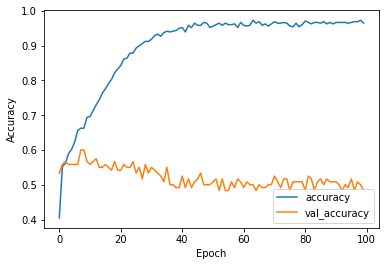

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

## save created model

In [ ]:
model.save('my_model.h5') 

In [ ]:
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 